In [1]:
#Plotter for Higgs Combine FitDiagnostics and for MonoZ datacards
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT
import uproot
import uproot_methods
import physt
from scipy import interpolate
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.optimize import curve_fit, fsolve
import physt

plt.style.use('physics.mplstyle')

Welcome to JupyROOT 6.20/06


In [2]:
#Open the file and grab the histograms
fn = '/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/fitDiagnosticsMonoZ_ARC.root'
f = uproot.open(fn)
histograms = f.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
for name, roothist in histograms:
    print (name)

b'shapes_prefit/cat3L2016/DY;1'
b'shapes_prefit/cat3L2016/Signal;1'
b'shapes_prefit/cat3L2016/TOP;1'
b'shapes_prefit/cat3L2016/VVV;1'
b'shapes_prefit/cat3L2016/WZ;1'
b'shapes_prefit/cat3L2016/ZZ;1'
b'shapes_prefit/cat3L2016/total;1'
b'shapes_prefit/cat3L2016/total_signal;1'
b'shapes_prefit/cat3L2016/total_background;1'
b'shapes_prefit/cat3L2016/total_covar;1'
b'shapes_prefit/cat3L2017/DY;1'
b'shapes_prefit/cat3L2017/Signal;1'
b'shapes_prefit/cat3L2017/TOP;1'
b'shapes_prefit/cat3L2017/VVV;1'
b'shapes_prefit/cat3L2017/WW;1'
b'shapes_prefit/cat3L2017/WZ;1'
b'shapes_prefit/cat3L2017/ZZ;1'
b'shapes_prefit/cat3L2017/total;1'
b'shapes_prefit/cat3L2017/total_signal;1'
b'shapes_prefit/cat3L2017/total_background;1'
b'shapes_prefit/cat3L2017/total_covar;1'
b'shapes_prefit/cat3L2018/DY;1'
b'shapes_prefit/cat3L2018/Signal;1'
b'shapes_prefit/cat3L2018/TOP;1'
b'shapes_prefit/cat3L2018/VVV;1'
b'shapes_prefit/cat3L2018/WW;1'
b'shapes_prefit/cat3L2018/WZ;1'
b'shapes_prefit/cat3L2018/ZZ;1'
b'shapes_prefi

In [11]:
#grab the histograms of interest
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    era = "2016"
    channel = "chBSM"
    if  "shapes_fit_b/"+channel+era+"/ZZ" in name:
            #print (roothist.numpy())
            ZZ_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WZ" in name:
            WZ_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WW" in name:
            WW_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/TOP" in name:
            TOP_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/DY" in name:
            DY_freq = np.abs(roothist.numpy())[0]
            print(np.sum(DY_freq))
    if  "shapes_fit_b/"+channel+era+"/VVV" in name:
            VVV_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/total_background" in name:
            bg_freq = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/data" in name:
            data_freq = np.abs(roothist.numpy())[0]

    era = "2017"
    channel = "chBSM"
    if  "shapes_fit_b/"+channel+era+"/ZZ" in name:
            #print (roothist.numpy())
            ZZ_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WZ" in name:
            WZ_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WW" in name:
            WW_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/TOP" in name:
            TOP_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/DY" in name:
            DY_freq17 = np.abs(roothist.numpy())[0]
            print(np.sum(DY_freq17))
    if  "shapes_fit_b/"+channel+era+"/VVV" in name:
            VVV_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/total_background" in name:
            bg_freq17 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/data" in name:
            data_freq17 = np.abs(roothist.numpy())[0]
            
    era = "2018"
    channel = "chBSM"
    if  "shapes_fit_b/"+channel+era+"/ZZ" in name:
            #print (roothist.numpy())
            ZZ_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WZ" in name:
            WZ_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/WW" in name:
            WW_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/TOP" in name:
            TOP_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/DY" in name:
            DY_freq18 = np.abs(roothist.numpy())[0]
            print(np.sum(DY_freq18))
    if  "shapes_fit_b/"+channel+era+"/VVV" in name:
            VVV_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/total_background" in name:
            bg_freq18 = np.abs(roothist.numpy())[0]
    if  "shapes_fit_b/"+channel+era+"/data" in name:
            data_freq18 = np.abs(roothist.numpy())[0]

ZZ = ZZ16 + ZZ17 + ZZ18
ZZ_freq = ZZ_freq16 + ZZ_freq17 + ZZ_freq18
WZ_freq = WZ_freq16 + WZ_freq17 + WZ_freq18
WW_freq = WW_freq16 + WW_freq17 + WW_freq18
TOP_freq = TOP_freq16 + TOP_freq17 + TOP_freq18
DY_freq = DY_freq16 + DY_freq17 + DY_freq18
VVV_freq = VVV_freq16 + VVV_freq17 + VVV_freq18
bg_freq = bg_freq16 + bg_freq17 + bg_freq18
#data_freq = data_freq16 + data_freq17 + data_freq18
#Grab the TGraph for data            
f2 = ROOT.TFile.Open("/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/fitDiagnosticsMonoZ_ARC.root")
data_hist16 = f2.Get("shapes_fit_b/"+channel+"2016"+"/data")
data_hist17 = f2.Get("shapes_fit_b/"+channel+"2017"+"/data")
data_hist18 = f2.Get("shapes_fit_b/"+channel+"2018"+"/data")
#data_hist = data_hist16 + data_hist17 + data_hist18
#data_hist = f2.Get("shapes_fit_b/"+channel+"2016"+"/data")
npoints = data_hist16.GetN()
data_set = []
values16 = data_hist16.GetY()
values17 = data_hist17.GetY()
values18 = data_hist18.GetY()
for i in range(npoints):
    data_set.append(values16[i])
    #data_set.append(values16[i]+values17[i]+values18[i])
    
    
    
bins = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])*1000.
#bins = np.array([  80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
#        350.,  400.,  500.,  600., 1000.])
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])

file_out = uproot.recreate("/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/output.root", compression=uproot.ZLIB(4))
#file_out["ZZ"] = np.histogram(ZZ_freq,bins)
#hist, binning = plt.hist(binc,bins=bins,weights=ZZ_freq)
print (ZZ_freq)
print (binc)
#newhist = physt.histogram1d.Histogram1D(
#    bin_centers = physt.binnings.NumpyBinning(binc), 
#    binning = physt.binnings.NumpyBinning(bins),
#    frequencies= ZZ_freq
    #errors2=roothist.variances[bins[0]:bins[1]]
#    )


file_out["ZZ"] = uproot_methods.classes.TH1.from_numpy(np.histogram(hist,binc))

file_out.close()

938.5796
2680.908
4430.1484


NameError: name 'ZZ16' is not defined

26
25


NameError: name 'data_set' is not defined

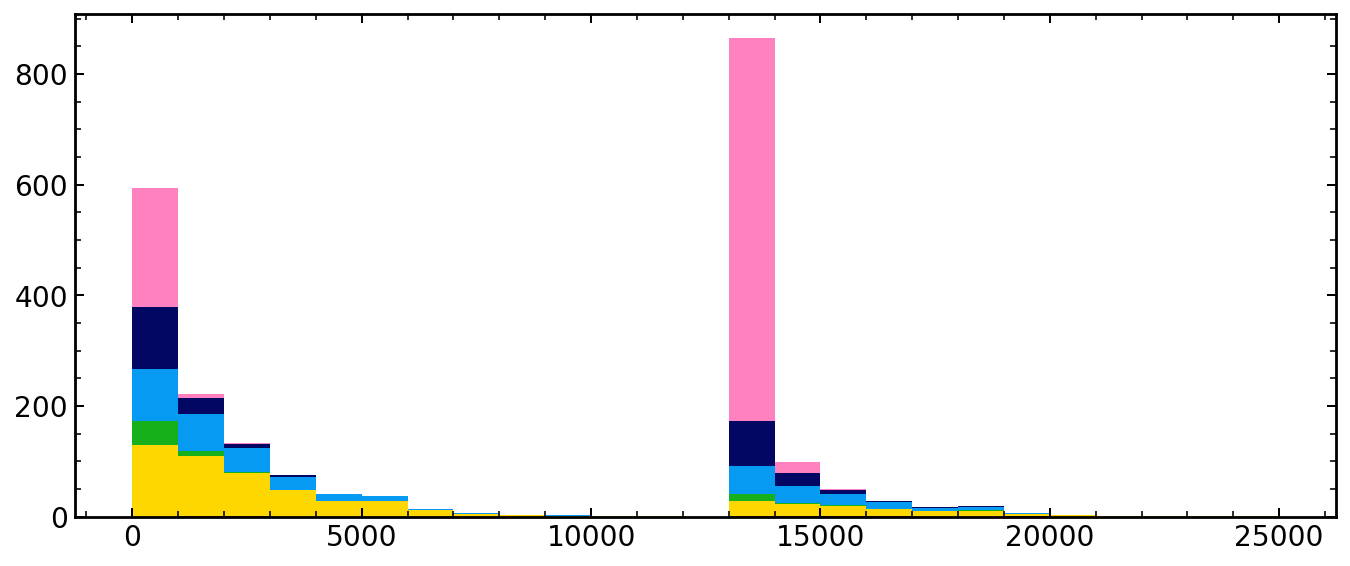

In [10]:
#Set up the bins
#bins = np.array([50.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,  350.,
#         400.,  500.,  600., 1000., 1060., 1110., 1135., 1160., 1185.,
#        1210., 1260., 1310., 1360., 1410., 1510., 1610., 2010.])

bins = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])*1000.
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])
xerr = np.diff(bins)*0.5

print (np.size(bins))
print (np.size(DY_freq))

#Set up variables for the stacked histogram
bg_freq = VVV_freq + ZZ_freq + WW_freq + WZ_freq + TOP_freq + DY_freq
freqs = [VVV_freq, ZZ_freq, WW_freq, WZ_freq, TOP_freq, DY_freq]
binsc = [binc, binc, binc, binc, binc, binc]
proc_name = ["VVV", "ZZ", "WW", "WZ", "TOP", "DY"]
colors = ["maroon", "gold", mcd.XKCD_COLORS["xkcd:green"].upper(), mcd.XKCD_COLORS["xkcd:azure"].upper(), mcd.XKCD_COLORS["xkcd:darkblue"].upper(), mcd.XKCD_COLORS["xkcd:pink"].upper()]

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

#the histograms (SM,Data)
ax1.hist(binsc,bins=bins,weights=freqs,stacked=True, color=colors, label=proc_name)
ax1.errorbar(binc,data_set, xerr=xerr, color="black", fmt='o')

#Labels and limits
ax1.set_yscale("log")
ax1.set_ylim(0.1,10000)
ax1.legend(loc="upper right", fontsize=14)
ax1.set_ylabel(r"$events$")
cms = ax1.text(
        0.5, 11000., u"CMS $\it{preliminary}$",
        fontsize=16, fontweight='bold',
    )
lumi = ax1.text(
        20500, 11000., r"%.1f fb$^{-1}$ (13 TeV)" % 137,
        fontsize=14, 
    )


#Adding in the ratio plot
ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.errorbar(binc,data_set/bg_freq, xerr=xerr, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0,2)
ax2.set_xlabel(r"$p_{T}^{miss}$ (GeV)")

In [5]:
fn = '/eos/user/c/cmsdas/long-exercises/MonoZ/CMSDAS_NTuples_WS/DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph/WS_tree_0.root'
f = uproot.open(fn)
histograms = f.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
for name, roothist in histograms:
    print (name)

b'measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-0jet;1'
b'MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-0jet;1'
b'measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catEM;1'
b'MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catEM;1'
b'measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-1jet;1'
b'MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-1jet;1'
b'measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat3L;1'
b'MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat3L;1'
b'measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat4L;1'
b'MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat4L;1'

measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-0jet
MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-0jet
measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catEM
MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catEM
measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-1jet
MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-1jet
measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat3L
MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat3L
measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat4L
MT_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_cat4L
measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-1

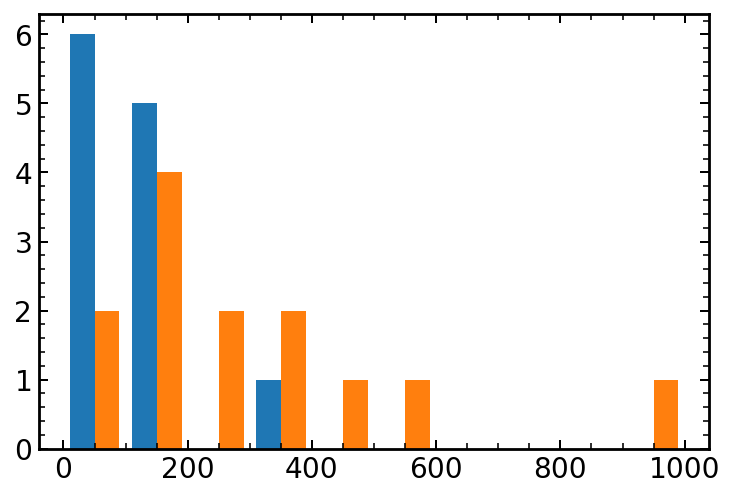

In [10]:
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    if  "measMET_DarkMatter_MonoZToLL_NLO_Pseudo_Mx-1_Mv-10_gDM1_gQ1_TuneCUETP8M1_13TeV-madgraph_catSignal-0jet_sys_ElectronEnUp" in name:
        hist = np.abs(roothist.numpy())
    print (name)

(array([41.,  8.,  5.,  3.,  3.,  1.,  3.,  2.,  3.,  6.]),
 array([   0. ,  274.9,  549.8,  824.7, 1099.6, 1374.5, 1649.4, 1924.3,
        2199.2, 2474.1, 2749. ]),
 <a list of 10 Patch objects>)

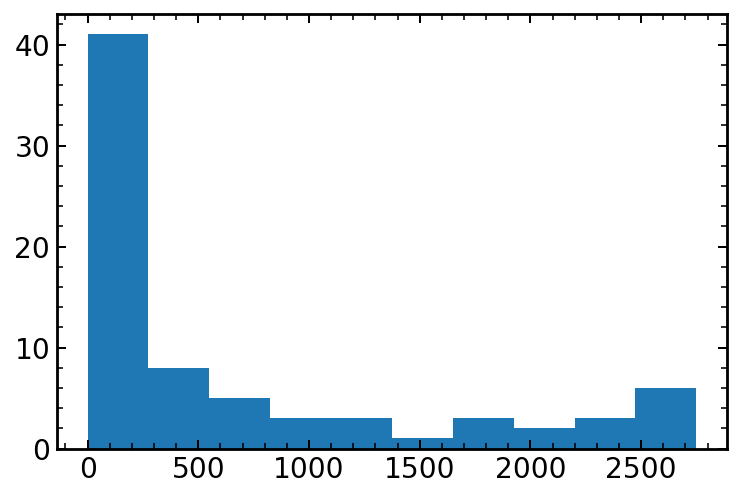

In [12]:
plt.hist(roothist.numpy()[0])